In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/jupyter/Pv_Data2.csv")
df;
X = df.drop(['Target'],axis=1).values

Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [3]:
pca = PCA(n_components=7)
pca.fit(X)
X_pca = pca.transform(X)

In [4]:
trainX, testX, trainY, testY = train_test_split(X_pca, Y, test_size = 0.3,random_state=42)

In [5]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [6]:
tree = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=11, random_state=0)

In [7]:
tree.fit(trainX,trainY);

In [8]:
ypred=tree.predict(trainX)

In [9]:
c=accuracy_score(trainY,ypred)*100
c

98.83928571428572

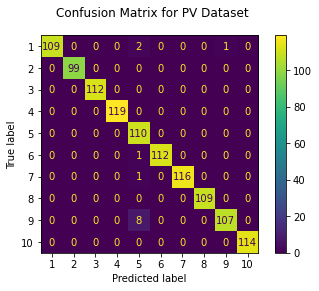

In [10]:
fig = plot_confusion_matrix(tree,trainX,trainY, display_labels=tree.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [11]:
ypred1=tree.predict(testX)

In [12]:
c1=accuracy_score(testY,ypred1)*100
c1

91.45833333333333

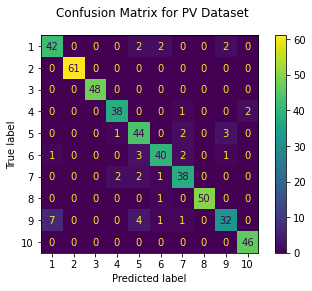

In [18]:
fig = plot_confusion_matrix(tree,testX,testY, display_labels=tree.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [19]:
YR=np.concatenate((trainY,testY),axis=0)

In [20]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [21]:
ac2=accuracy_score(YR,YP)*100
ac2

96.625

In [22]:
c2=confusion_matrix(YR,YP)
c2

array([[151,   0,   0,   0,   4,   2,   0,   0,   3,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 160,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 157,   0,   0,   1,   0,   0,   2],
       [  0,   0,   0,   1, 154,   0,   2,   0,   3,   0],
       [  1,   0,   0,   0,   4, 152,   2,   0,   1,   0],
       [  0,   0,   0,   2,   3,   1, 154,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0, 159,   0,   0],
       [  7,   0,   0,   0,  12,   1,   1,   0, 139,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 160]], dtype=int64)

In [23]:
from gmdh import Classifier
model = Classifier()
model.fit(trainX,trainY)
ypred3=tree.predict(trainX)
c3=accuracy_score(trainY,ypred3)*100
c3

ModuleNotFoundError: No module named 'gmdh'